In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
races = pd.read_csv("races.csv")

In [3]:
runs = pd.read_csv("runs.csv")

In [4]:
df = pd.merge(runs, races, on = 'race_id')
df.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1_x',
       'time2_x', 'time3_x', 'time4_x', 'time5_x', 'time6_x', 'finish_time',
       'win_odds', 'place_odds', 'trainer_id', 'jockey_id', 'date', 'venue',
       'race_no', 'config', 'surface', 'distance', 'going', 'horse_ratings',
       'prize', 'race_class', 'sec_time1', 'sec_time2', 'sec_time3',
       'sec_time4', 'sec_time5', 'sec_time6', 'sec_time7', 'time1_y',
       'time2_y', 'time3_y', 'time4_y', 'time5_y', 'time6_y', 'time7',
       'place_combination1', 'place_combination2', 'place_combination3',
       'place_combination4', 'place_dividend1', 'plac

(16.0, 18.0)

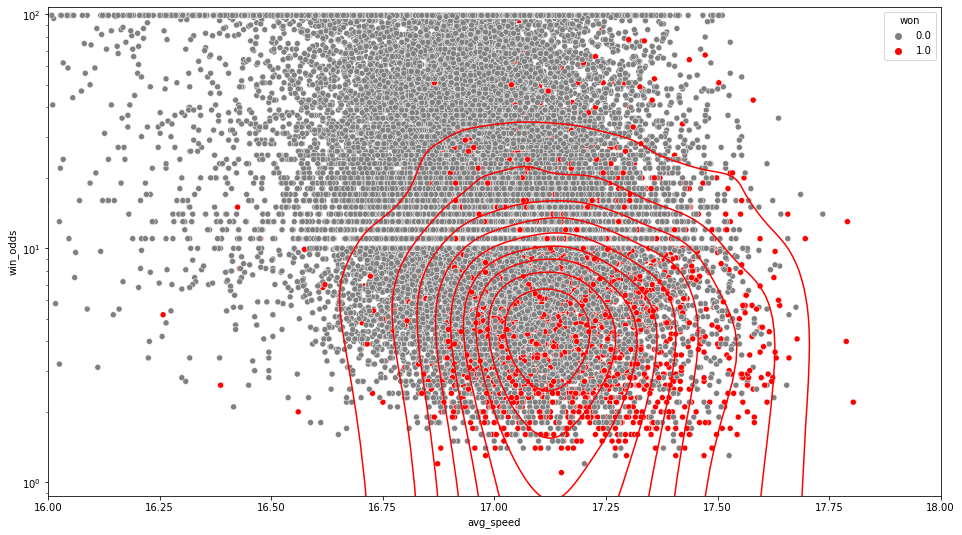

In [5]:
fig, ax = plt.subplots(figsize=(16,9))
df['avg_speed'] = df['distance'] / df['finish_time']

df2 = df[df['distance'] == 1200]
sns.scatterplot(x = df2['avg_speed'], y= df2['win_odds'], hue = df2['won'], palette = ['grey','red'], ax = ax)
tmp = df2[df2['won'] == 1]
sns.kdeplot(x = tmp['avg_speed'], y =tmp['win_odds'], ax=ax, color = 'red')
ax.set_yscale("log")
ax.set_xlim(16,18)


In [6]:
df = df.sort_values('distance')

<AxesSubplot:xlabel='finish_time', ylabel='Count'>

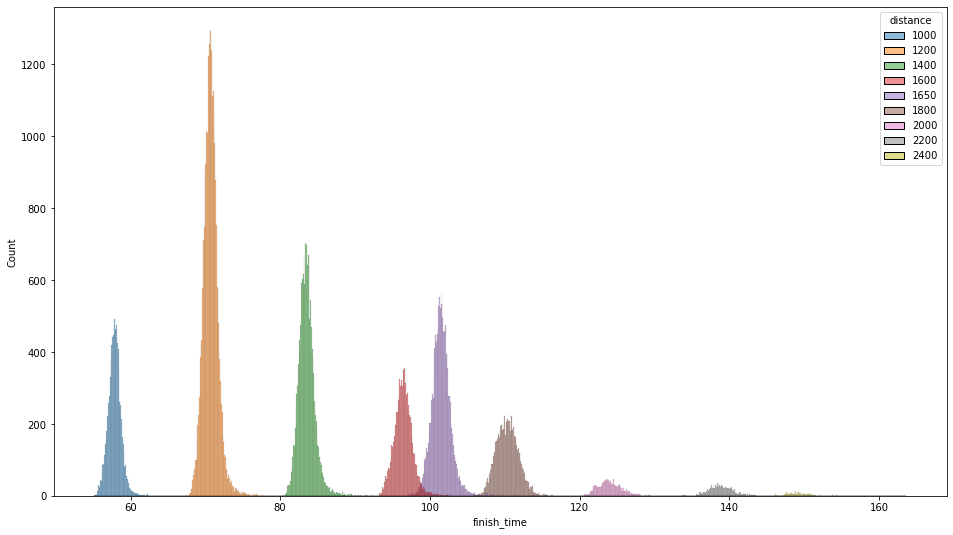

In [7]:
plt.figure(figsize=(16,9))
sns.histplot(x = df['finish_time'], hue = df['distance'].apply(str), bins = 1000)

Text(0, 0.5, 'Count')

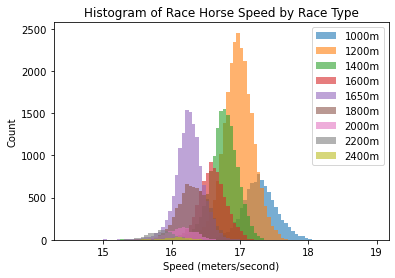

In [8]:
for i in df['distance'].unique():
    tmp  = df[df['distance'] == i]
    plt.hist(tmp['avg_speed'], bins = np.arange(14.5,19,0.05), label = f'{i}m', alpha = 0.6);
plt.legend()
plt.title('Histogram of Race Horse Speed by Race Type')
plt.xlabel('Speed (meters/second)')
plt.ylabel('Count')

Text(0, 0.5, 'Probability')

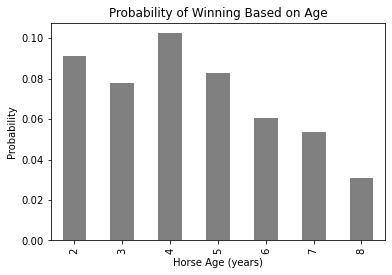

In [9]:
fig, ax = plt.subplots()
df.groupby('horse_age').mean()['won'].head(7).plot(kind = 'bar', ax = ax, color = 'gray')
plt.title('Probability of Winning Based on Age')
plt.xlabel('Horse Age (years)') 
plt.ylabel('Probability')

0.946144524652621

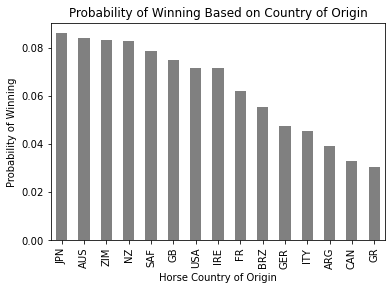

In [10]:
fig, ax = plt.subplots()
df.sort_values('won')
df.groupby('horse_country').mean()['won'].sort_values(ascending=False).head(15).plot(kind = 'bar', ax = ax, color = 'gray')
plt.title('Probability of Winning Based on Country of Origin')
plt.xlabel('Horse Country of Origin') 
plt.ylabel('Probability of Winning')

df.groupby('horse_country').mean()['won'].sort_values(ascending=False).head(15).sum()

In [11]:
z = np.polyfit(df['distance'].apply(int), df['avg_speed'], 1)
p = np.poly1d(z)
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

y=-0.001234x+(18.462639)


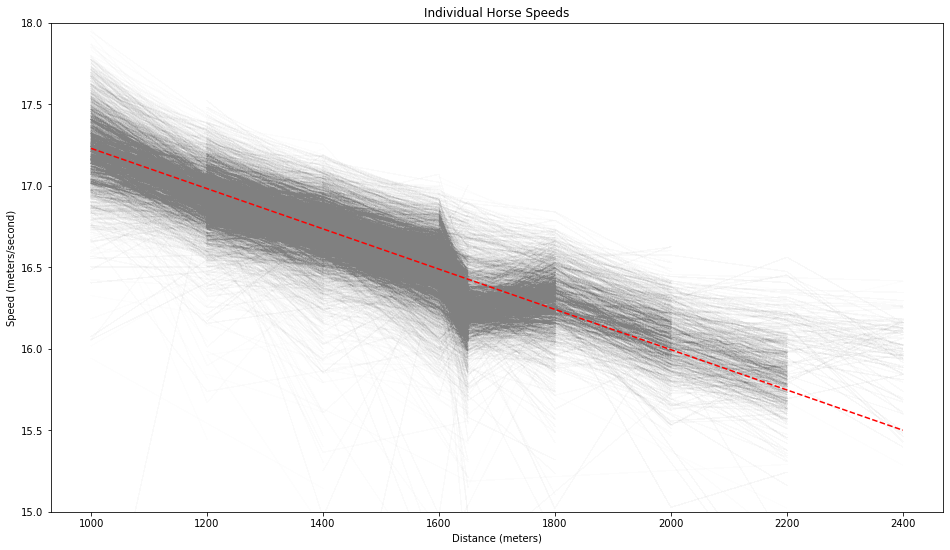

In [12]:

df['avg_speed'] = df['distance'] / df['finish_time']

tmp = pd.DataFrame(df.groupby(['horse_id','distance']).mean()['avg_speed']).reset_index()
tmp
pd.pivot_table(tmp, values = 'avg_speed',index='horse_id', columns='distance').sample(10)

plt.figure(figsize=(16,9))
for i in tmp['horse_id']:
    tmp2 = tmp[tmp['horse_id'] == i]
    plt.plot(tmp2['distance'], tmp2['avg_speed'], color = 'grey', alpha = 0.002)
#plt.legend()
plt.plot(df['distance'],p(df['distance']),"r--")
plt.title('Individual Horse Speeds')
plt.xlabel("Distance (meters)")
plt.ylabel("Speed (meters/second)")
plt.ylim(15,18)
plt.show()


In [13]:
track = []
for i in df['surface']:
    if i == 0:
        track.append('Dirt')
    else:
        track.append('Turf')
df['surface'] = track

In [14]:

tmp = pd.DataFrame(df.groupby(['horse_id','distance']).mean()['avg_speed']).reset_index()
tmp
df1 = pd.pivot_table(tmp, values = 'avg_speed',index='horse_id', columns='distance').sample(10)
df1

distance,1000,1200,1400,1600,1650,1800,2000,2200,2400
horse_id,,,,,,,,,
1781,NaN,17.007647,16.800674,16.658371,16.270300,16.262161,NaN,14.344396,NaN
2166,NaN,17.181680,16.836396,16.720660,16.372150,NaN,NaN,NaN,NaN
3355,17.222082,16.981834,16.532829,NaN,NaN,NaN,NaN,NaN,NaN
2270,NaN,17.264162,16.940949,NaN,NaN,NaN,NaN,NaN,NaN
434,17.088475,16.744717,16.473229,NaN,16.214623,NaN,NaN,NaN,NaN
1056,17.452007,16.970725,16.947910,16.728619,16.434567,16.725167,NaN,NaN,NaN
3132,16.917611,16.944531,NaN,NaN,16.508254,NaN,NaN,NaN,NaN
3112,NaN,17.052721,16.807833,16.426884,16.307219,16.406643,NaN,NaN,NaN
1472,NaN,NaN,16.716418,16.529787,NaN,NaN,16.062967,NaN,NaN


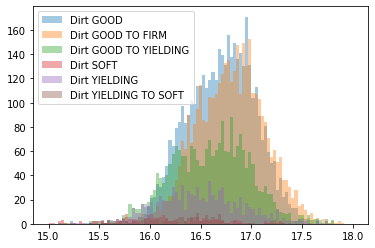

In [15]:
tmp = pd.DataFrame(df.groupby(['horse_id','surface','going']).mean()['avg_speed']).reset_index()
tmp
pd.pivot_table(tmp, values = 'avg_speed',index='horse_id', columns=['surface','going']).sample(10)

tmp = pd.pivot_table(tmp, values = 'avg_speed',index='horse_id', columns=['surface','going'])
tmp.columns = [' '.join(col).strip() for col in tmp.columns.values]


for i in tmp.columns:
    tmp2 = tmp[i]
    if i.split()[0] == "Dirt":
        plt.hist(x = tmp2, label = i, bins = np.linspace(15,18,100), alpha = 0.4)
plt.legend()
plt.show()


In [40]:
tmp = pd.DataFrame(df.groupby(['horse_id','won']).mean()['avg_speed']).reset_index()
tmp = tmp.dropna(how = 'any')
pd.pivot_table(tmp, values = 'avg_speed',index='horse_id', columns='won').sample(10)

won,0.0,1.0
horse_id,,
4161,16.917287,17.107746
25,16.417924,16.101763
445,17.066504,17.085213
3050,17.397111,17.593440
1199,17.092841,17.121257
1306,16.850212,17.063958
947,16.980165,16.934765
2487,16.819827,NaN
1385,16.643551,NaN


In [41]:
df4 = pd.DataFrame(df.groupby(['horse_id','distance','surface','going']).mean()['avg_speed'])
df4

avg_speed
horse_id distance surface going                      
0        1200     0       GOOD              16.820261
                          GOOD TO FIRM      16.816160
         1400     0       GOOD              16.922519
                          GOOD TO FIRM      16.885780
         1600     0       GOOD              16.754022
...                                               ...
4404     1800     0       GOOD TO FIRM      16.473084
                          GOOD TO YIELDING  16.384489
                  1       GOOD              16.012810
         2000     0       GOOD              16.032064
                          GOOD TO FIRM      16.295934

[29828 rows x 1 columns]

In [42]:
races = pd.read_csv("races.csv")
runs = pd.read_csv("runs.csv")

df = pd.merge(runs, races, on = 'race_id')
df['avg_speed'] = df['distance'] / df['finish_time']

df1 = pd.DataFrame(df.groupby('horse_id').mean()[['actual_weight','lengths_behind']])
df2 = pd.DataFrame(df.groupby('horse_id').sum()[['won']])
df3 = pd.DataFrame(df.groupby(['horse_id','distance','surface','going']).mean()['avg_speed'])

df4 = pd.concat([df1,df2], axis = 1).reset_index()


df4.columns = ['horse_id','actual_weight','avg_lengths_behind','wins']
df4

,horse_id,actual_weight,avg_lengths_behind,wins
0,0,125.256410,4.141026,4.0
1,1,123.038462,6.173077,1.0
2,2,124.363636,3.201515,2.0
3,3,123.666667,11.416667,0.0
4,4,118.275862,4.801724,1.0
...,...,...,...,...
4400,4400,121.666667,5.458333,3.0
4401,4401,123.230769,5.884615,0.0
4402,4402,125.967742,3.850000,5.0
4403,4403,122.500000,2.987500,1.0


In [43]:
runs_data = runs[['race_id', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
                  'horse_gear', 'declared_weight', 'won', 'draw', 'win_odds',
                  'place_odds', 'horse_id','horse_no']]

In [44]:
races_data = races[['race_id','venue', 'config', 'surface', 'distance', 
                    'going', 'race_class', 'date']]

In [45]:
df = pd.merge(runs_data, races_data)


df = pd.merge(df, df4, on = ['horse_id'])
df = pd.merge(df, df3, on = ['horse_id','distance','surface','going'])
df = df.dropna()

df.columns
X = df[['horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'declared_weight', 'win_odds',
       'place_odds', 'race_class','actual_weight',
       'avg_lengths_behind', 'wins', 'avg_speed']]
y = pd.get_dummies(df['won'])
X1 = pd.get_dummies(X)
X1

,horse_age,horse_rating,declared_weight,win_odds,place_odds,race_class,actual_weight,avg_lengths_behind,wins,avg_speed,...,horse_country_ZIM,horse_type_Brown,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
0,3,60,1020.0,9.7,3.7,5,120.500000,5.983333,2.0,16.619423,...,0,0,0,0,1,0,0,0,0,0
1,3,60,1019.0,21.0,10.0,5,120.500000,5.983333,2.0,16.619423,...,0,0,0,0,1,0,0,0,0,0
2,3,60,1028.0,17.0,6.9,5,120.500000,5.983333,2.0,16.154714,...,0,0,0,0,1,0,0,0,0,0
3,3,60,1032.0,14.0,4.3,5,120.500000,5.983333,2.0,16.154714,...,0,0,0,0,1,0,0,0,0,0
4,3,60,1025.0,10.0,2.6,4,120.500000,5.983333,2.0,16.154714,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79222,4,80,1216.0,26.0,6.6,3,129.500000,8.562500,0.0,16.873569,...,0,0,0,0,1,0,0,0,0,0
79225,3,60,1108.0,7.5,2.4,3,123.000000,3.625000,0.0,17.062554,...,0,0,0,0,1,0,0,0,0,0
79227,3,57,1094.0,99.0,20.0,4,130.000000,5.250000,0.0,16.913319,...,0,0,0,0,1,0,0,0,0,0
79230,3,52,1102.0,1.5,1.2,4,124.333333,0.166667,2.0,17.263703,...,0,0,0,0,1,0,0,0,0,0


In [50]:
X1 = MinMaxScaler().fit_transform(X1)

In [51]:
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime

In [52]:

# Building a linear stack of layers with the sequential model
model = Sequential()

# Adding dropout to prevent overfitting
model.add(Dropout(0.2, input_shape=(X1.shape[1],)))

# First hidden layer with 500 output spaces
model.add(Dense(200, activation='relu'))

# More dropout to prevent overfitting
model.add(Dropout(0.2))

# Second hidden layer with 150 output spaces
model.add(Dense(50, activation='softmax'))

# Output layer with 3 output spaces
model.add(Dense(2, activation='softmax'))

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Early stopping
callbacks = [EarlyStopping(monitor='loss', patience=10),
         ModelCheckpoint(filepath='best_model_cat_comments.h5', monitor='val_loss', save_best_only=True)]

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 34)                0         
_________________________________________________________________
dense (Dense)                (None, 200)               7000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 17,152
Trainable params: 17,152
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Training the model
start = datetime.datetime.now()
print("Operation Started: "+str(start.strftime("%m/%d/%y %H:%M:%S")))
history = model.fit(X1, 
                    y, 
                    batch_size=128, 
                    epochs = 20,
                   # callbacks=callbacks
                   )
end = datetime.datetime.now()
print("Operation Ended:"+str(end.strftime("%m/%d/%y %H:%M:%S")))
duration = end-start
print(f"Training Time: {str((duration.seconds // 3600)).zfill(2)}:\
{str((duration.seconds // 60)).zfill(2)}:\
{str((duration.seconds % 60)).zfill(2)}")

Operation Started: 05/28/21 09:02:41
Epoch 1/20
592/592 [==============================] - 2s 2ms/step - loss: 0.4298 - accuracy: 0.9206
Epoch 2/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2798 - accuracy: 0.9206
Epoch 3/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2818 - accuracy: 0.9188
Epoch 4/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.9213
Epoch 5/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2536 - accuracy: 0.9200
Epoch 6/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2458 - accuracy: 0.9215
Epoch 7/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.9200
Epoch 8/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9202
Epoch 9/20
592/592 [==============================] - 1s 2ms/step - loss: 0.2450 - accuracy: 0.9195
Epoch 10/20
592/592 [==============================] - 1s 2ms/s

In [56]:
df['nn_pred'] = pd.DataFrame(model.predict(X1))[0]

In [59]:
df6 = pd.DataFrame(df.groupby(['race_id']).sum()['nn_pred']).reset_index()
df6.columns = ['race_id','pred_race_sum']

df7 = pd.merge(df, df6, on =['race_id'])
df7['nn_pred'] = df7['nn_pred'] / df7['pred_race_sum']

df7 = df7.drop(['pred_race_sum'],axis = 1)
df7 = pd.merge(df7, y, left_index=True, right_index=True)
df7 = df7[['race_id','horse_id','horse_age','avg_speed','actual_weight','wins','nn_pred',0,1]].sort_values('race_id')
df7.columns = ['race_id','horse_id','horse_age','avg_speed'	,'actual_weight','wins','nn_pred','real_loss',	'real_win']

df7 = df7.sort_values('nn_pred', ascending=False)

df7

,race_id,horse_id,horse_age,avg_speed,actual_weight,wins,nn_pred,real_loss,real_win,nn_pred_win
75649,5981,1586,3,17.278618,121.100000,2.0,1.000000,1,0,1
62822,5861,1695,4,16.957916,120.413793,5.0,0.509540,1,0,0
62821,5861,3181,8,16.894759,121.470588,6.0,0.490460,1,0,0
75317,6103,3210,5,16.647099,124.321429,2.0,0.479911,1,0,0
75509,6032,3774,3,16.933949,120.000000,1.0,0.361947,1,0,0
...,...,...,...,...,...,...,...,...,...,...
73633,6128,1153,4,16.844278,123.538462,2.0,NaN,1,0,0
73636,6128,2531,3,17.038975,122.000000,1.0,NaN,1,0,0
73637,6128,221,3,16.835017,126.444444,0.0,NaN,1,0,0
73639,6128,3368,3,17.174755,125.800000,2.0,NaN,1,0,0


In [69]:
df7.groupby('race_id').count()['horse_id']

df7 = df7[df7['race_id'] == 0]
df7['nn_pred_win'] = (df7['nn_pred'].max() == df7['nn_pred']).apply(int)
df7['place'] = np.arange(1,15)
df7[['race_id',
 'horse_id',
 'place',
 'horse_age',
 'avg_speed',
 'actual_weight',
 'wins',
 'nn_pred',
 'real_loss',
 'real_win',
 'nn_pred_win']]


,race_id,horse_id,place,horse_age,avg_speed,actual_weight,wins,nn_pred,real_loss,real_win,nn_pred_win
6,0,911,1,3,16.636958,121.958333,3.0,0.074921,1,0,1
9,0,2998,2,3,15.927509,116.600000,0.0,0.074879,0,1,0
4,0,2796,3,3,16.758655,125.916667,0.0,0.074725,1,0,0
3,0,1853,4,3,16.682010,126.250000,0.0,0.074566,1,0,0
8,0,1730,5,3,16.627078,121.181818,1.0,0.074539,1,0,0
11,0,2617,6,3,16.706089,123.000000,0.0,0.074176,1,0,0
13,0,306,7,3,16.615042,112.428571,0.0,0.072480,1,0,0
1,0,2157,8,3,16.754428,122.468750,2.0,0.071781,1,0,0
7,0,2170,9,3,16.876863,121.000000,2.0,0.070689,1,0,0
0,0,3917,10,3,16.619423,120.500000,2.0,0.070396,1,0,0
